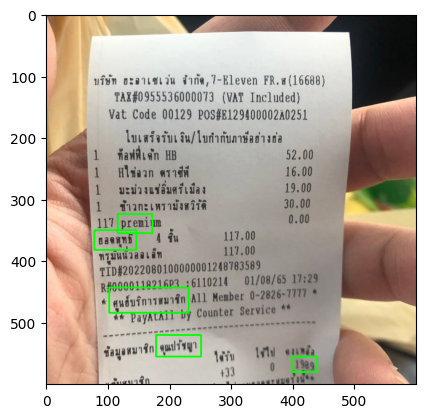

In [2]:
# https://f.ptcdn.info/617/045/000/ocry4h3xsDvXLhR6EmN-o.jpg

from typing import Any, Dict
import numpy as np
import cv2
from utils import load_model, download_image, generate_line_list
from utils.detect import detect_pipeline
import matplotlib.pyplot as plt
from llm.convert import convert_text_to_json
import easyocr

# reader, model, processor, device = load_model()
# images_list, dataframe = detect_pipeline(reader, name)
reader = easyocr.Reader(["en", 'th'])



-3.280467445742904


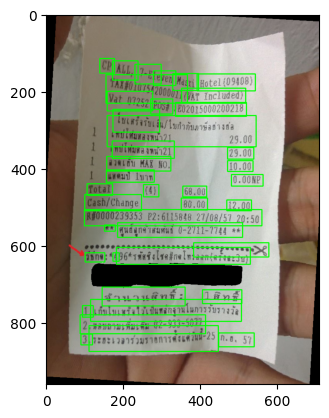

In [39]:
from jdeskew.estimator import get_angle
from jdeskew.utility import rotate

name = "/home/monshinawatra/payment-extraction/logs/query_image_20240525063632.jpg"
im = cv2.imread(name)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
angle = get_angle(im)
print(angle)
im = rotate(im, angle)


im = im[:, :, :]
# Detect text from image
result = reader.detect(im, text_threshold=0.05)
points = [point for point in result[0][0]]

rotate_points = []
for rotate_box in result[1][0]:
    rotate_box = np.array(rotate_box).reshape(4, 2).astype(np.int32)
    x, y, w, h = cv2.boundingRect(rotate_box)

    rotate_points.append((x, x + w, y, y + h))

points.extend(rotate_points)
# points = rotate_points
for point in points:
    cv2.rectangle(im, (point[0], point[2]), (point[1], point[3]), (0, 255, 0), 2)

plt.imshow(im)
plt.show()

In [35]:
import re

text = """
Here is the reformatted JSON output:

{
    "items": [
        { 
            "name": "ศูนย์ศาสตร์ ตลาดว.", 
            "price": 20.00, 
            "qty": 1.0, 
            "discount": 0.0
        },
        { 
            "name": "รปrrue รเว", 
            "price": 20.00, 
            "qty": 1.0, 
            "discount": 0.0
        },
        { 
            "name": "พร้อมบิลนมนมซูชิ", 
            "price": 0.0, 
            "qty": 0.0, 
            "discount": 0.0
        },
        { 
            "name": "กก", 
            "price": 0.0, 
            "qty": 0.0, 
            "discount": 0.0
        },
        { 
            "name": "โปรน้ํารสอาปูเต็มเงินเงินสดจํากัด", 
            "price": 0.0, 
            "qty": 0.0, 
            "discount": 0.0
        },
        { 
            "name": "สะสมมูลค่า50บ.", 
            "price": 0.0, 
            "qty": 0.0, 
            "discount": 0.0
        },
        { 
            "name": "#201 โกรล", 
            "price": 0.0, 
            "qty": 0.0, 
            "discount": 0.0
        }
    ]
}
"""

re.search("\{(.|\n)*\}", text).group()

'{\n    "items": [\n        { \n            "name": "ศูนย์ศาสตร์ ตลาดว.", \n            "price": 20.00, \n            "qty": 1.0, \n            "discount": 0.0\n        },\n        { \n            "name": "รปrrue รเว", \n            "price": 20.00, \n            "qty": 1.0, \n            "discount": 0.0\n        },\n        { \n            "name": "พร้อมบิลนมนมซูชิ", \n            "price": 0.0, \n            "qty": 0.0, \n            "discount": 0.0\n        },\n        { \n            "name": "กก", \n            "price": 0.0, \n            "qty": 0.0, \n            "discount": 0.0\n        },\n        { \n            "name": "โปรน้ํารสอาปูเต็มเงินเงินสดจํากัด", \n            "price": 0.0, \n            "qty": 0.0, \n            "discount": 0.0\n        },\n        { \n            "name": "สะสมมูลค่า50บ.", \n            "price": 0.0, \n            "qty": 0.0, \n            "discount": 0.0\n        },\n        { \n            "name": "#201 โกรล", \n            "price": 0.0, \n          

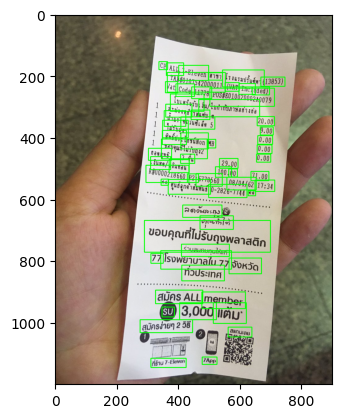

In [19]:
name = "/home/monshinawatra/payment-extraction/query_image_20240525045328.jpg"

im = cv2.imread(name)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = im[:, :, :]
# Detect text from image
result = reader.detect(im, text_threshold=0.05)
points = [point for point in result[0][0]]

rotate_points = []
for rotate_box in result[1][0]:
    rotate_box = np.array(rotate_box).reshape(4, 2).astype(np.int32)
    x, y, w, h = cv2.boundingRect(rotate_box)

    rotate_points.append((x, x + w, y, y + h))

points.extend(rotate_points)
# points = rotate_points
for point in points:
    cv2.rectangle(im, (point[0], point[2]), (point[1], point[3]), (0, 255, 0), 2)

plt.imshow(im)
plt.show()

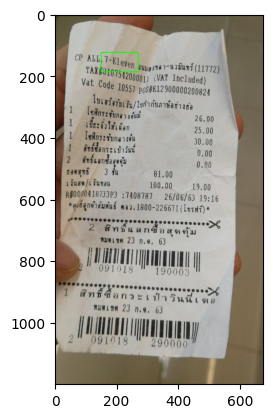

In [14]:
import cv2
import numpy as np

rotate_box = result[1][0][0]
rotate_box = np.array(rotate_box).reshape(4, 2).astype(np.int32)

# Convert to x, y, w, h

# Draw rectangle
cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(im)
plt.show()